In [1]:
import numpy as np
import re
import time
import yaml
import h5py
from pprint import pprint
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Plotting style configuration
#print(plt.rcParams.keys())
otrap_stl = {
    "axes.titlesize": 20,
    "axes.labelsize": 24,
    "lines.linewidth": 3,
    "lines.markersize": 10,
    "xtick.labelsize": 24,
    "ytick.labelsize": 24,
    "font.size": 20,
    "font.sans-serif": 'Helvetica',
    "text.usetex": False,
    'mathtext.fontset': 'cm',
}
plt.style.use(otrap_stl)

In [3]:
SQRT_PI = np.sqrt(np.pi)
sec = .0357 # sec
um = .025 # um
pN = .1644 # pN
nm = 25. # nm
nM = 106382.978723404 # nM for molecular simulations
nM_fp = 1147.604948473 #nM for PDE and ME simulations

In [4]:
dir_path = Path.home() / 'projects/DATA/C-GLASS/OT_v1/'

In [5]:
def get_ot_force(h5_data, species_name = 'filament-trap'):
    """ Get force on bead from optical based on position"""
    k_spring = h5_data['optical_trap_data/' + species_name].attrs['trap_spring']
    trap_pos_arr = h5_data['optical_trap_data/' + species_name +'/trap_position'][:,:,0]
    bead_pos_arr = h5_data['optical_trap_data/' + species_name +'/bead_position'][:,:,0]
    time = h5_data['optical_trap_data/' + species_name +'/time'][...]
    return time, k_spring *(trap_pos_arr - bead_pos_arr)

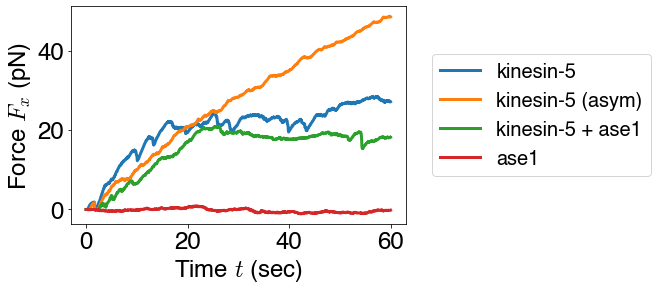

In [6]:
try:
    h5_data_kin5 = h5py.File(dir_path / '20-08-19_CG_OT_stat_rigid_kin5/ot_test_data.h5', 'r')
    h5_data_asym = h5py.File(dir_path / '20-08-19_CG_OT_stat_rigid_kin5_asym/ot_test_data.h5', 'r')
    h5_data_mix = h5py.File(dir_path / '20-08-19_CG_OT_stat_rigid_kin5_ase1/ot_test_data.h5', 'r')
    h5_data_ase1 = h5py.File(dir_path / '20-08-19_CG_OT_stat_rigid_ase1/ot_test_data.h5', 'r')
    time, ot_force_kin5 = get_ot_force(h5_data_kin5)
    time, ot_force_asym = get_ot_force(h5_data_asym)
    time, ot_force_mix = get_ot_force(h5_data_mix)
    time, ot_force_ase1 = get_ot_force(h5_data_ase1)
    fig, ax = plt.subplots()
    ax.plot(time*sec, -ot_force_kin5[:,1]*pN, label='kinesin-5')
    ax.plot(time*sec, -ot_force_asym[:,1]*pN, label='kinesin-5 (asym)')
    ax.plot(time*sec, -ot_force_mix[:,1]*pN, label='kinesin-5 + ase1')
    ax.plot(time*sec, -ot_force_ase1[:,1]*pN, label='ase1')
    ax.set_xlabel('Time $t$ (sec)')
    ax.set_ylabel('Force $F_x$ (pN)')
    ax.legend(loc='center left', bbox_to_anchor=(1.05, .5))
except:
    raise
finally:
    h5_data_kin5.close()
    h5_data_asym.close()
    h5_data_mix.close()
    h5_data_ase1.close()
    
    

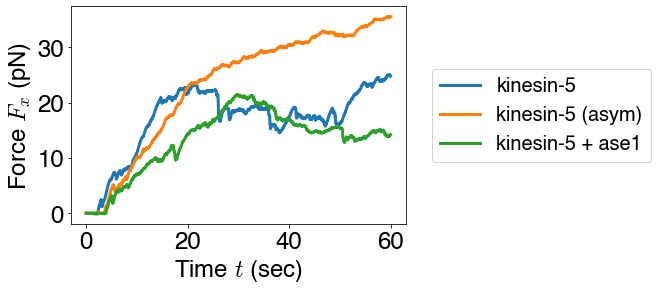

In [7]:
"""Graphs where static and optically trapped filaments are the same length"""
try:
    fig, ax = plt.subplots()
    
    h5_data_kin5 = h5py.File(dir_path / '20-08-20_CG_OT_stat_rigid_kin5_eqL/ot_test_data.h5', 'r')
    time, ot_force_kin5 = get_ot_force(h5_data_kin5)
    ax.plot(time*sec, -ot_force_kin5[:,1]*pN, label='kinesin-5')
    
    h5_data_asym = h5py.File(dir_path / '20-08-20_CG_OT_stat_rigid_kin5_asym_eqL/ot_test_data.h5', 'r')
    time, ot_force_asym = get_ot_force(h5_data_asym)
    ax.plot(time*sec, -ot_force_asym[:,1]*pN, label='kinesin-5 (asym)')
    
    h5_data_mix = h5py.File(dir_path / '20-08-20_CG_OT_stat_rigid_kin5_ase1_eqL/ot_test_data.h5', 'r')
    time, ot_force_mix = get_ot_force(h5_data_mix)
    ax.plot(time*sec, -ot_force_mix[:,1]*pN, label='kinesin-5 + ase1')
    
    #h5_data_ase1 = h5py.File(dir_path / '20-08-20_CG_OT_stat_rigid_ase1_eqL/ot_test_data.h5', 'r')
    #time, ot_force_ase1 = get_ot_force(h5_data_ase1)
    #ax.plot(time*sec, -ot_force_ase1[:,1]*pN, label='ase1')
    
    ax.set_xlabel('Time $t$ (sec)')
    ax.set_ylabel('Force $F_x$ (pN)')
    ax.legend(loc='center left', bbox_to_anchor=(1.05, .5))
except:
    raise
finally:
    h5_data_kin5.close()
    #h5_data_asym.close()
    #h5_data_mix.close()
    #h5_data_ase1.close()
    

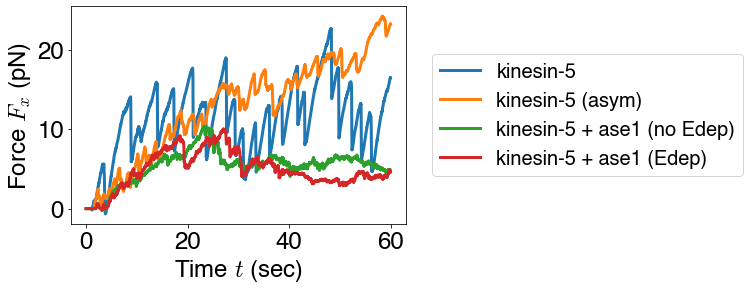

In [12]:
"""Graphs with energy-dependence added to kinesin-5"""
try:
    h5_data_kin5 = h5py.File(dir_path / '20-08-20_CG_OT_stat_rigid_kin5_Edep.5/ot_test_data.h5', 'r')
    h5_data_asym = h5py.File(dir_path / '20-08-20_CG_OT_stat_rigid_kin5_asym_Edep.5/ot_test_data.h5', 'r')
    h5_data_mix = h5py.File(dir_path / '20-08-20_CG_OT_stat_rigid_kin5_ase1_Edep.5/ot_test_data.h5', 'r')
    h5_data_mix_both = h5py.File(dir_path / '20-08-20_CG_OT_stat_rigid_kin5_ase1_Edep.5_both/ot_test_data.h5', 'r')
    #h5_data_ase1 = h5py.File(dir_path / '20-08-20_CG_OT_stat_rigid_ase1_Edep.5/ot_test_data.h5', 'r')
    
    time, ot_force_kin5 = get_ot_force(h5_data_kin5)
    time_asym, ot_force_asym = get_ot_force(h5_data_asym)
    time, ot_force_mix = get_ot_force(h5_data_mix)
    time, ot_force_mix_both = get_ot_force(h5_data_mix_both)
    #time, ot_force_ase1 = get_ot_force(h5_data_ase1)
    fig, ax = plt.subplots()
    ax.plot(time*sec, -ot_force_kin5[:,1]*pN, label='kinesin-5')
    ax.plot(time_asym*sec, -ot_force_asym[:,1]*pN, label='kinesin-5 (asym)')
    ax.plot(time*sec, -ot_force_mix[:,1]*pN, label='kinesin-5 + ase1 (no Edep)')
    ax.plot(time*sec, -ot_force_mix_both[:,1]*pN, label='kinesin-5 + ase1 (Edep)')
    #ax.plot(time*sec, -ot_force_ase1[:,1]*pN, label='ase1')
    ax.set_xlabel('Time $t$ (sec)')
    ax.set_ylabel('Force $F_x$ (pN)')
    ax.legend(loc='center left', bbox_to_anchor=(1.05, .5))
except:
    raise
finally:
    h5_data_kin5.close()
    h5_data_asym.close()
    h5_data_mix.close()
    h5_data_mix_both.close()
    #h5_data_ase1.close()